In [6]:
%run 'functions_dump.py'
%run 'ks29_Get_folder_structure.ipynb'

In [7]:
structural_data = pd.read_hdf(files_dump_folder + 'structural_data_for_monomer.hdf', 'data')

In [8]:
colnames_His3_Scer_PLM = ['position1', 'amino_acid_1', 'position2', 'amino_acid_2', 'nothing', 'PML_score']
evolutionary_coupling = pd.read_table(files_dump_folder + 'evolutionary_coupling_analysis_with_evfold/ev_couplings/' + 'His3_Scer_PLM.txt',
             names=colnames_His3_Scer_PLM, sep=' ', header=None)

In [9]:
evolutionary_coupling['position_pair'] = evolutionary_coupling.apply(lambda df: frozenset(df[['position1', 'position2']].values), axis=1)
evolutionary_coupling[:4]

,position1,amino_acid_1,position2,amino_acid_2,nothing,PML_score,position_pair
0,28,L,29,A,0,1.158260,"(28, 29)"
1,28,L,30,I,0,0.810840,"(28, 30)"
2,28,L,31,E,0,0.317860,"(28, 31)"
3,28,L,32,H,0,0.313349,"(32, 28)"


In [40]:
positions_coupling = evolutionary_coupling.groupby('position_pair')['PML_score'].agg(np.max)
positions_coupling = pd.DataFrame(positions_coupling)
positions_coupling['positions_set'] = positions_coupling.index.map(lambda p: frozenset(p))
positions_coupling.set_index('positions_set', inplace=True)

In [34]:
def get_ep_summary_by_positions(epistasis_dictionary, function_for_series_summary, averaging_function):
    summary_dict = get_ep_summary(epistasis_dictionary, function_for_series_summary)
    positions_summary_dict = defaultdict(list)
    for mutA, mutB in summary_dict:
        positionA, positionB = int(mutA[:-1]), int(mutB[:-1])
        positions_summary_dict[frozenset((positionA, positionB))].append(summary_dict[mutA, mutB])
    for k,v in positions_summary_dict.items():
        positions_summary_dict[k] = averaging_function(v)
    return positions_summary_dict

get_ep_summary_by_positions(ep_dict, np.mean, np.max)

defaultdict(list,
            {frozenset({141, 143}): 0.11412358611019903,
             frozenset({175, 178}): -0.0039614427625440556,
             frozenset({110, 112}): 0.01906710928524729,
             frozenset({175, 177}): 0.01200825075389673,
             frozenset({172, 173}): -0.010692734163767653,
             frozenset({79, 80}): 0.042951199297663917,
             frozenset({171, 178}): 0.11833823630847966,
             frozenset({171, 172}): 0.072070634767966699,
             frozenset({195, 198}): 0.088766956536203867,
             frozenset({139, 140}): -0.035930455914985428,
             frozenset({177, 195}): 0.015426177199861852,
             frozenset({79, 82}): 0.021983451282083833,
             frozenset({104, 120}): 0.054203820173016622,
             frozenset({13, 26}): -0.01702491515360844,
             frozenset({39, 48}): -0.042190848068667894,
             frozenset({13, 25}): -0.0027103098758329987,
             frozenset({137, 140}): -0.0091041967496699964,
 

In [57]:
def get_ep_value(position_set):
    if frozenset(position_set) in position_ep_summary:
        return position_ep_summary[frozenset(position_set)]
    else:
        return None
    
positions_coupling['epistasis'] = positions_coupling.index.map(get_ep_value)
positions_coupling.dropna(inplace=True)

In [1]:
%run 'ks25_Read_epistasis.ipynb'

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


11510
259

Reading precalculated epistasis...
/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/epistasis_in_foursomes/



Variables: 

- ep_dict: a dictionary, Keys are tuples (mutA, mutB) and values are pandas.Series of epistasis between mutA and mutB in all backgrounds. 
Tuples (mutA, mutB) are sorted by aa_position.

- get_ep_summary: a function that takes ep_dict as an argument and applies an arbitrary function to every pd.Series object. For example, ep_summary = get_ep_summary(ep_dict, np.mean)

- get_ep_summary_by_positions: a function that uses get_ep_summary and then averages results by position_pair. For example, get_ep_summary_by_positions(ep_dict, np.max, np.mean) will apply np.max to epistasis series and then use np.mean to average across a position pair. 

Important: natlib_filtering is currently True. This can be changed in the cell #2.



In [46]:
position_ep_summary = get_ep_summary_by_positions(ep_dict, get, np.mean)

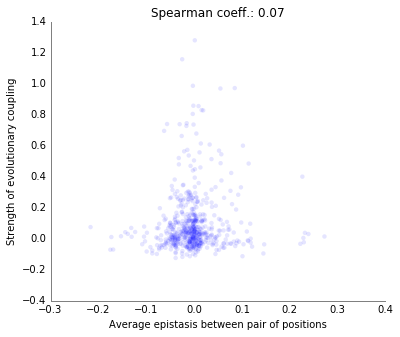

In [66]:
plot_better(width=6, height=5, grid='')
plt.scatter(positions_coupling.epistasis, positions_coupling.PML_score, edgecolor='none', alpha=0.1)
plt.xlabel('Average epistasis between pair of positions')
plt.ylabel('Strength of evolutionary coupling')
plt.title('Spearman coeff.: %.2f' %stats.spearmanr(positions_coupling.epistasis, positions_coupling.PML_score)[0])

In [61]:
print stats.spearmanr(positions_coupling.epistasis, positions_coupling.PML_score)

SpearmanrResult(correlation=0.067269317505253529, pvalue=0.10895433057402344)
